In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("zomato.csv", encoding='latin-1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
!pip install missingno


In [7]:
import missingno as msno

<AxesSubplot:>

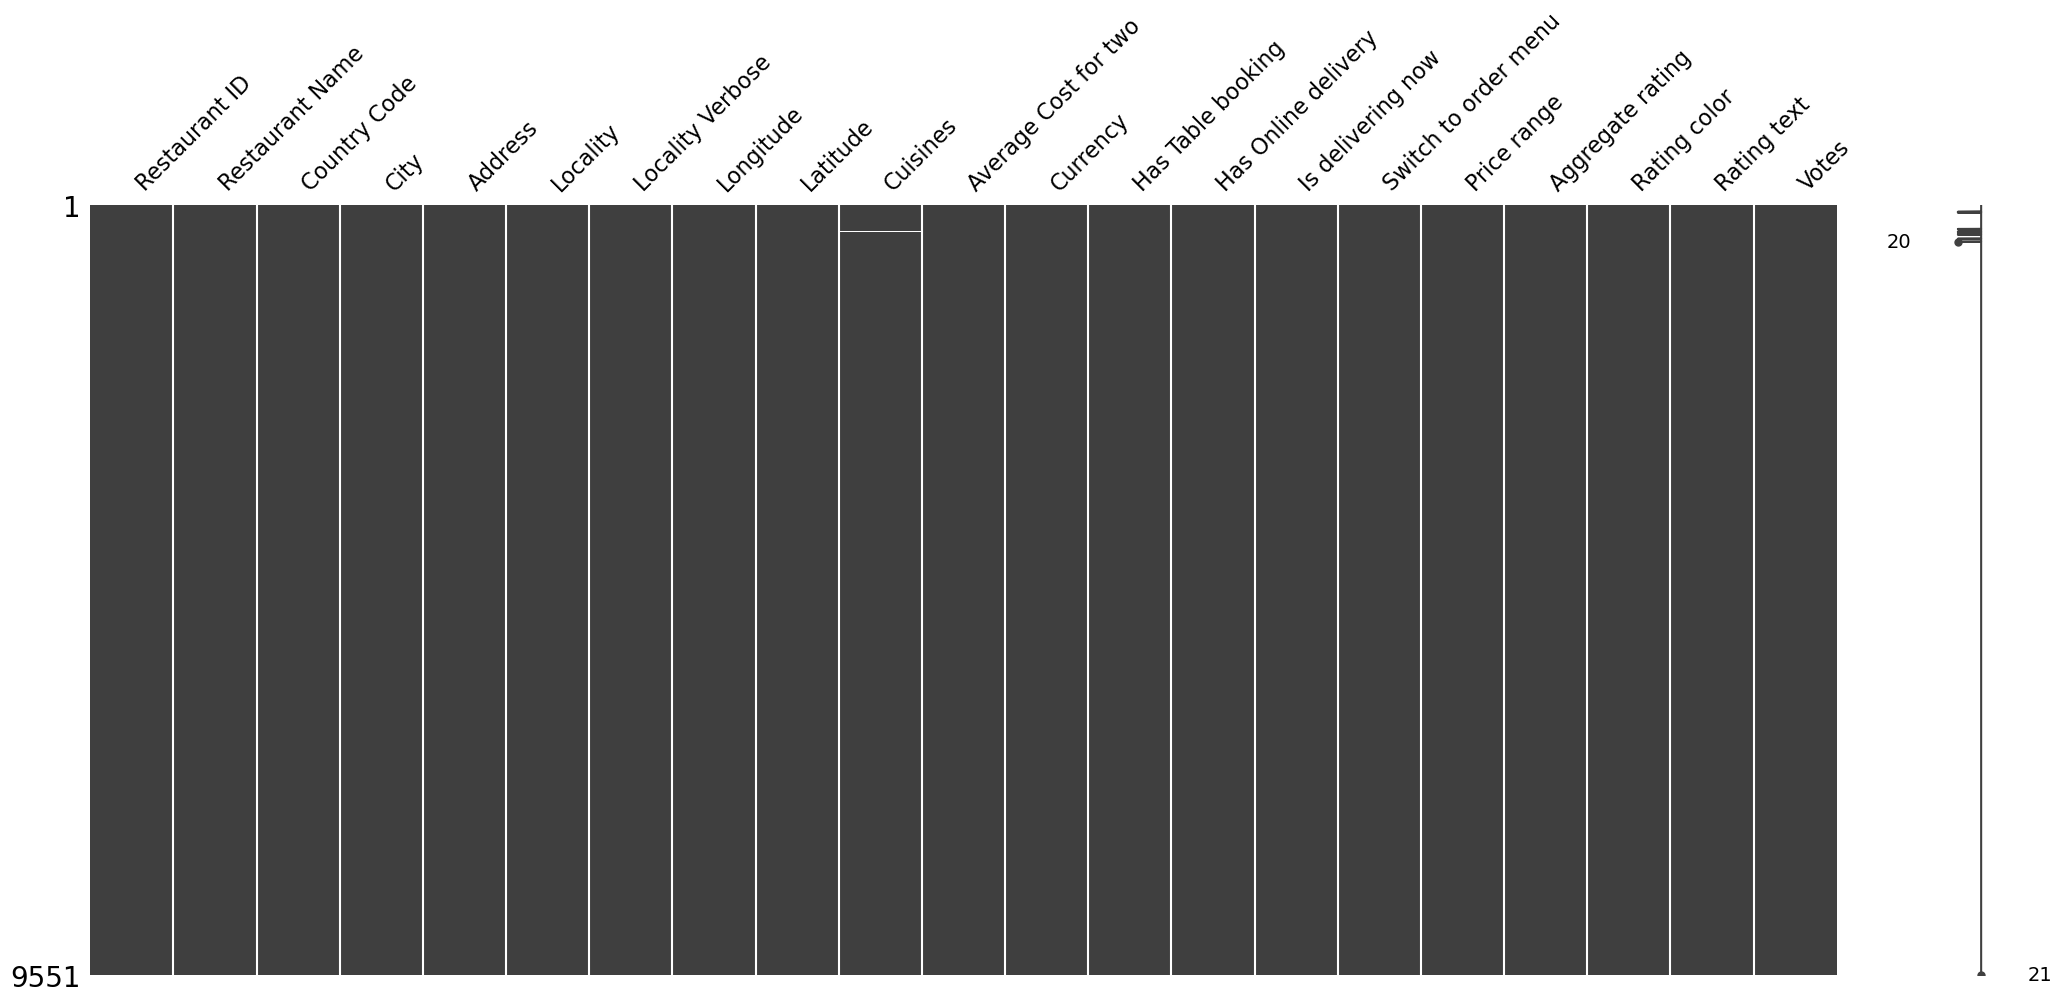

In [8]:
# Plot the missing data matrix
msno.matrix(df)

<AxesSubplot:>

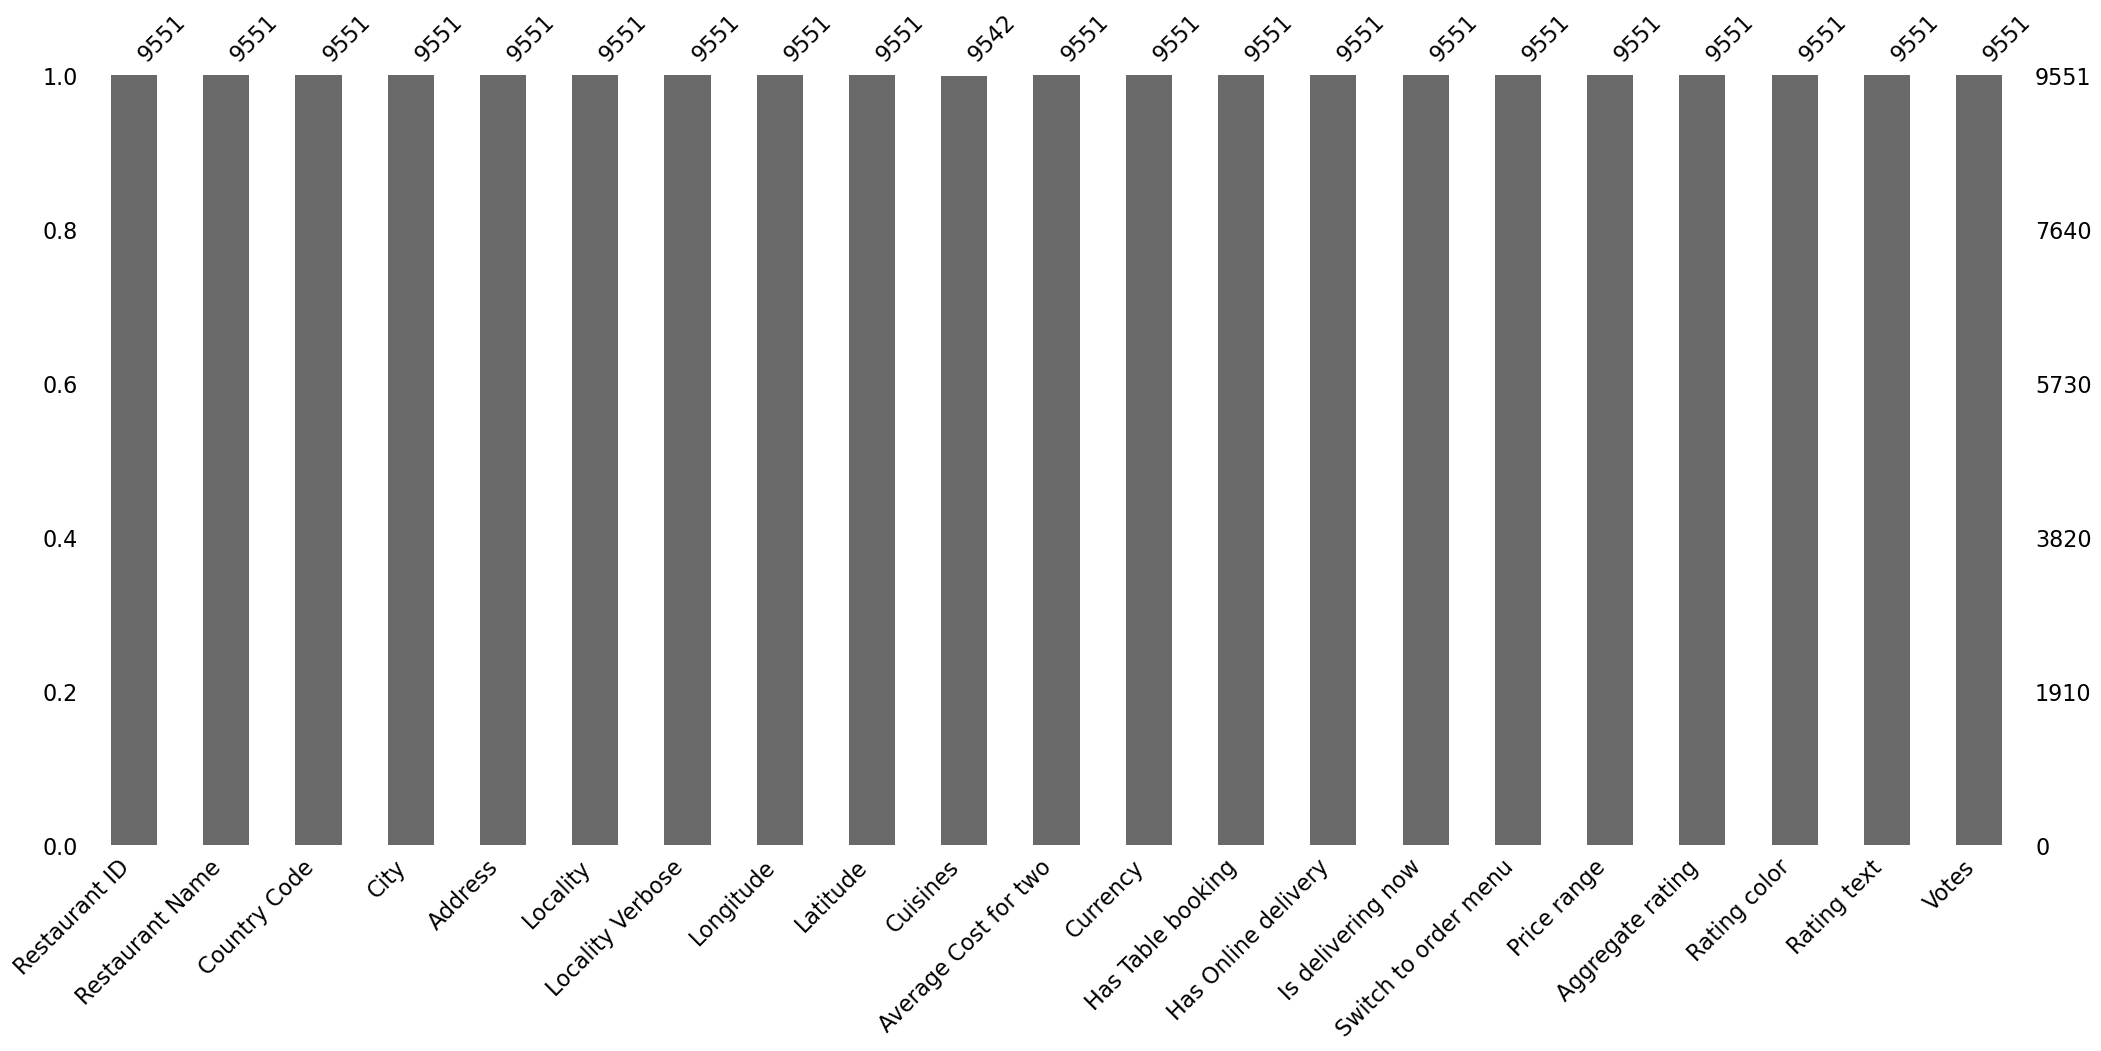

In [9]:
msno.bar(df)


<AxesSubplot:>

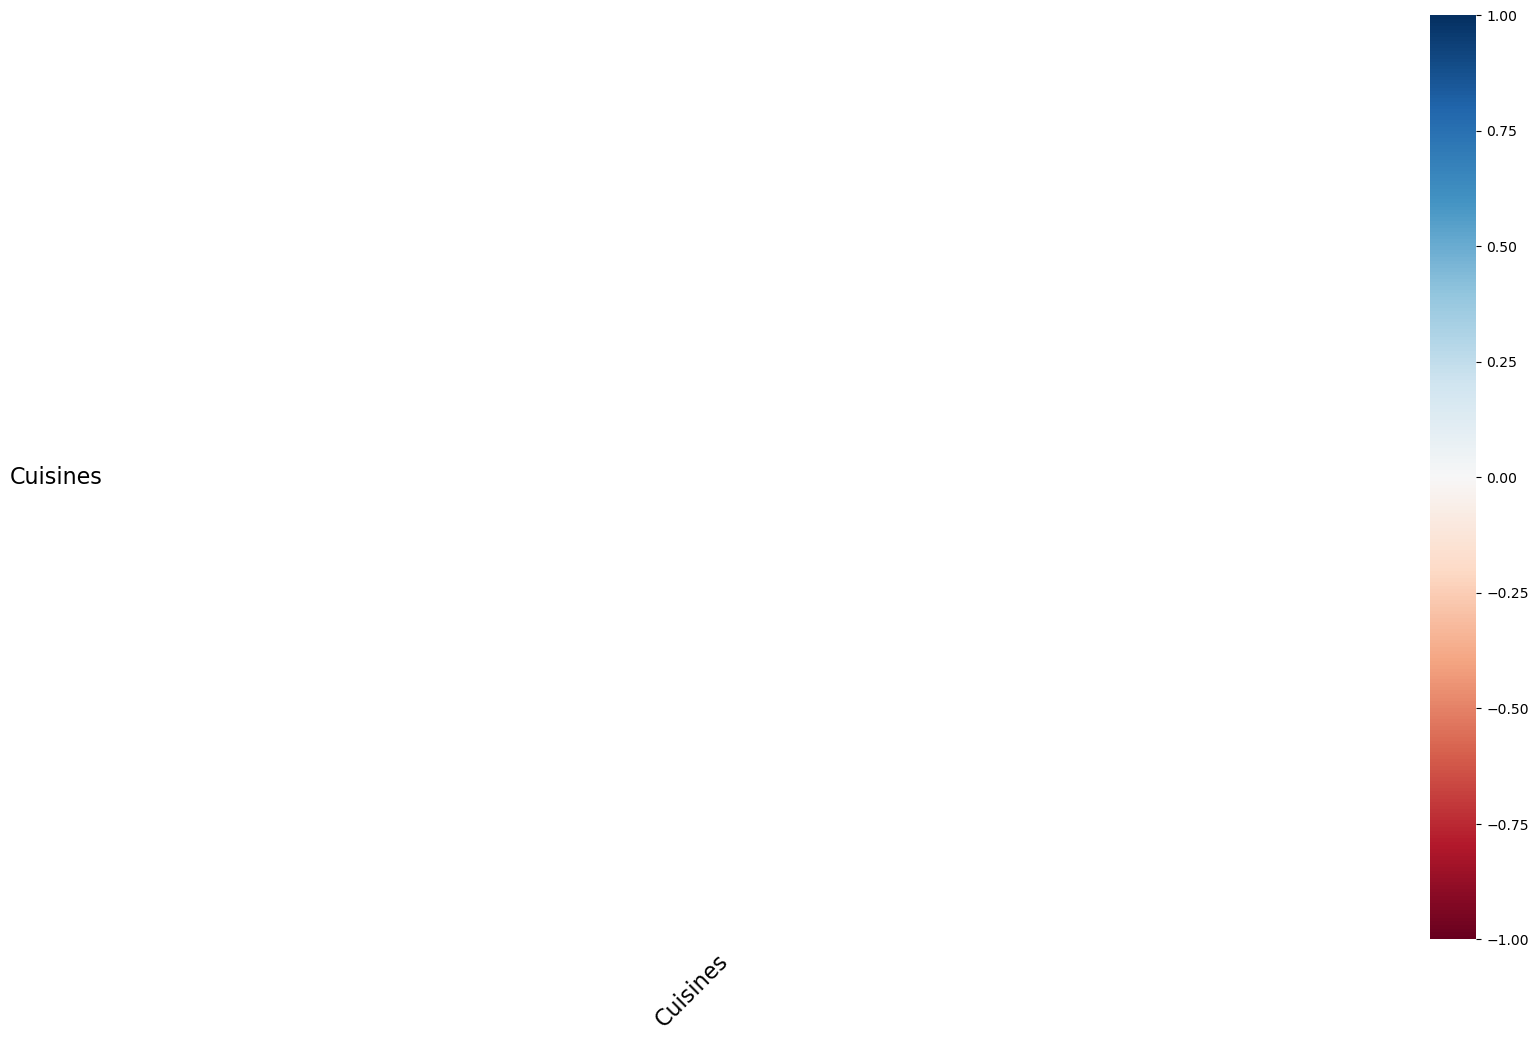

In [10]:
msno.heatmap(df)


<AxesSubplot:>

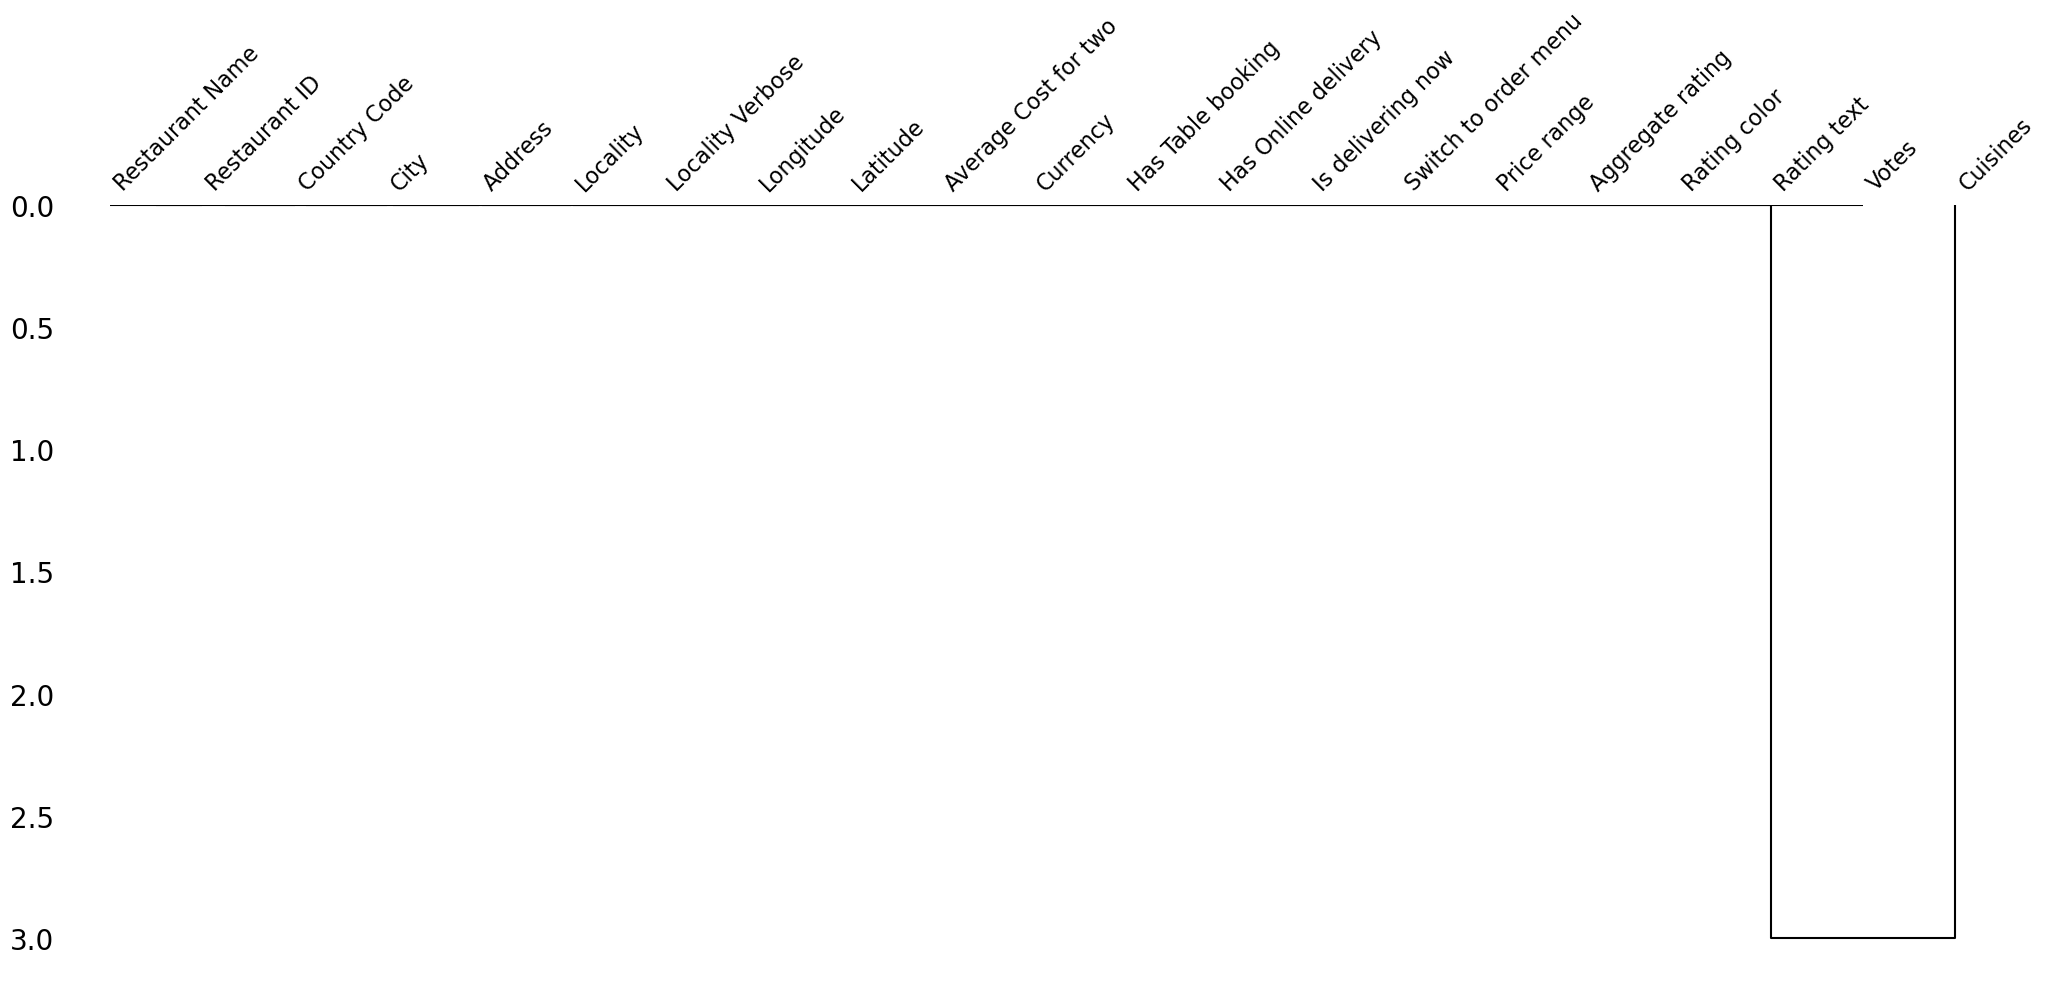

In [11]:
msno.dendrogram(df)


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [14]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<AxesSubplot:>

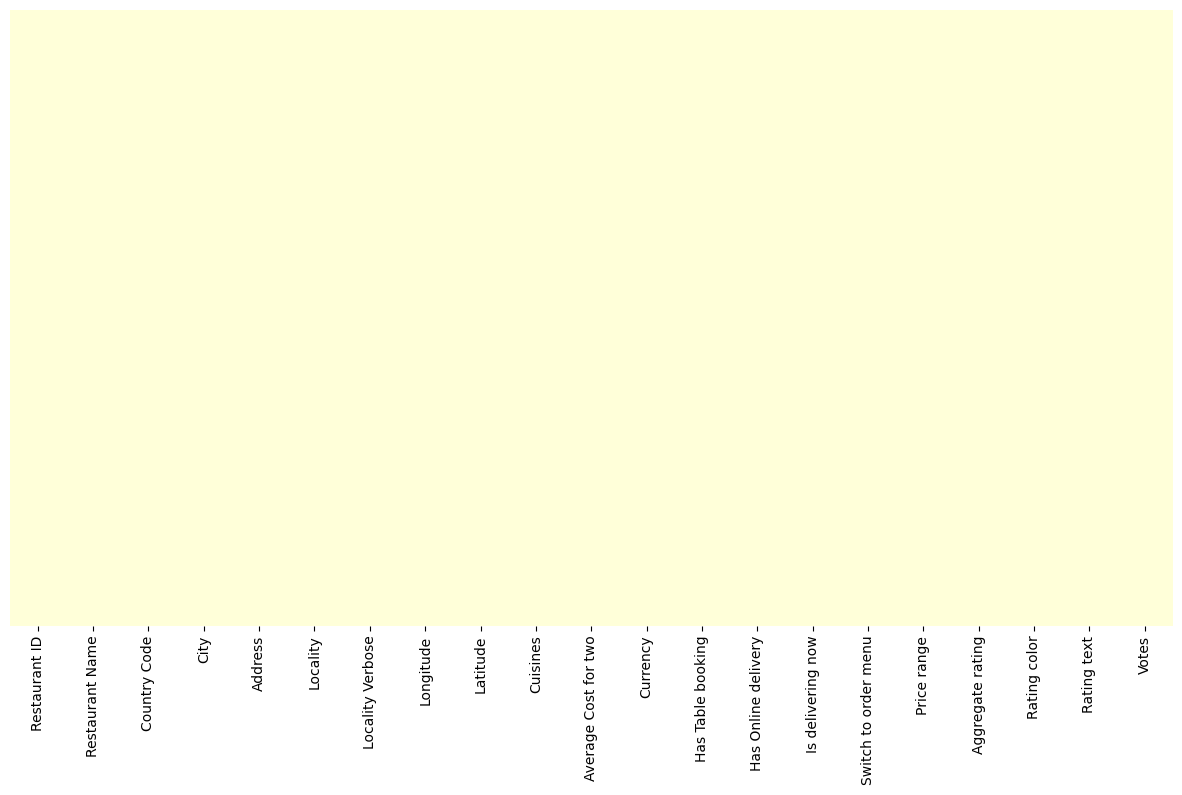

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

<AxesSubplot:>

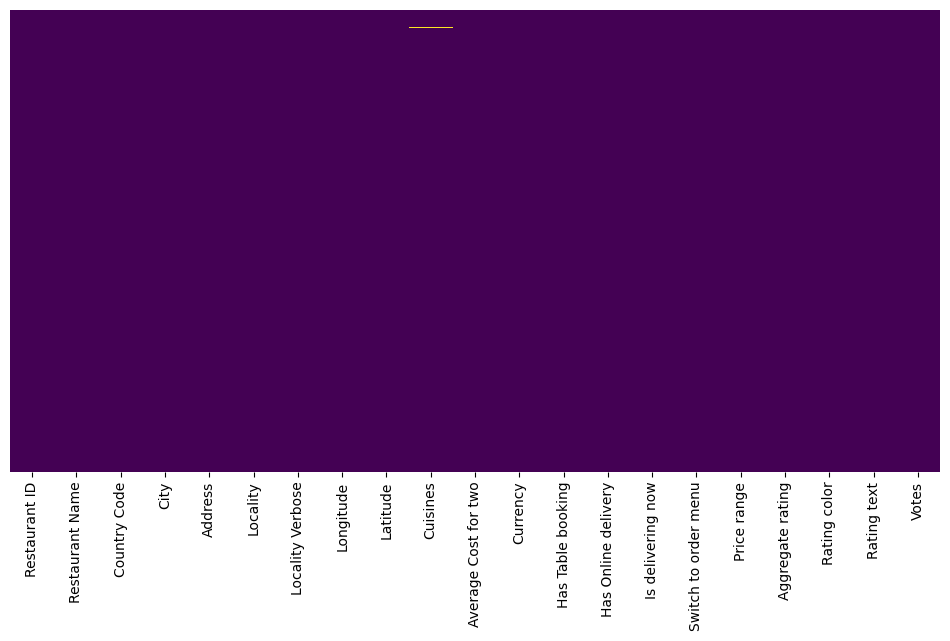

In [63]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
country=pd.read_excel('Country-Code.csv.xlsx')

In [18]:
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [19]:
country.columns

Index(['Country Code', 'Country'], dtype='object')

In [20]:
df_final=pd.merge(df,country,on='Country Code')

In [21]:
df_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [22]:
df_final['Country'].value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [23]:
countries=df_final['Country'].value_counts().index[0:5]

In [24]:
countries

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE'], dtype='object')

In [25]:
countries_value=df_final['Country'].value_counts().values[0:5]

In [26]:
countries_value

array([8652,  434,   80,   60,   60], dtype=int64)

Text(0.5, 1.0, 'zomato total order by country')

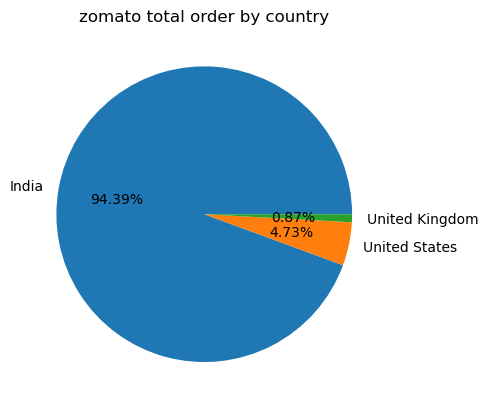

In [27]:
plt.pie(countries_value[:3],labels=countries[:3],autopct='%1.2f%%')
plt.title("zomato total order by country")

In [28]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
restaurent=df_final['Restaurant Name'].value_counts().index[:4]

In [30]:
restaurent

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop'], dtype='object')

In [31]:
restaurentbyoder=df_final['Restaurant Name'].value_counts().values[:4]

In [32]:
restaurentbyoder

array([83, 79, 63, 51], dtype=int64)

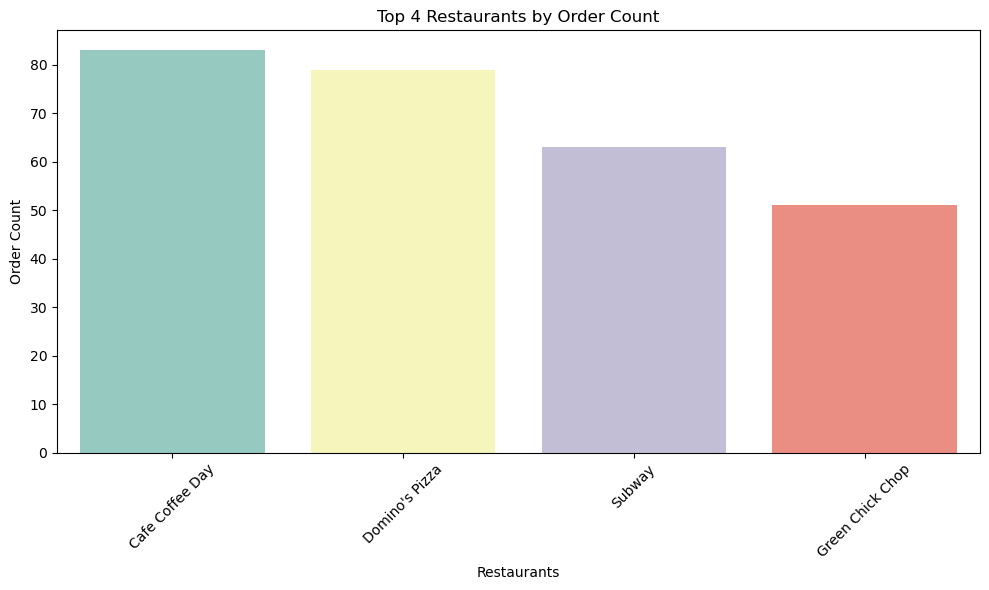

In [33]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=restaurent, y=restaurentbyoder, palette="Set3")

# Add labels and title
plt.xlabel('Restaurants')
plt.ylabel('Order Count')
plt.title('Top 4 Restaurants by Order Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensures labels fit in the plot area
plt.show()

In [34]:
Currencyname=df_final['Currency'].value_counts().index[:5]

In [35]:
currencyvalue=df_final['Currency'].value_counts().values[:5]

C:\Users\DCL\AppData\Local\Temp\ipykernel_13984\2235554927.py:14: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()  # Ensures labels fit in the plot area
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


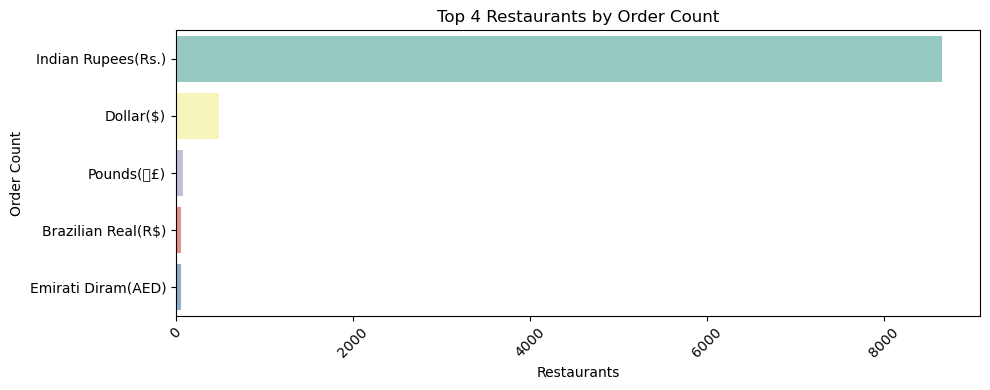

In [36]:
# Create the bar plot
plt.figure(figsize=(10,4))  # Set the figure size
sns.barplot(x=currencyvalue, y=Currencyname, palette="Set3")

# Add labels and title
plt.xlabel('Restaurants')
plt.ylabel('Order Count')
plt.title('Top 4 Restaurants by Order Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensures labels fit in the plot area
plt.show()

In [37]:
rating=df_final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating'})

In [53]:
rating.head()

,Aggregate rating,Rating color,Rating text,Rating
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating'>

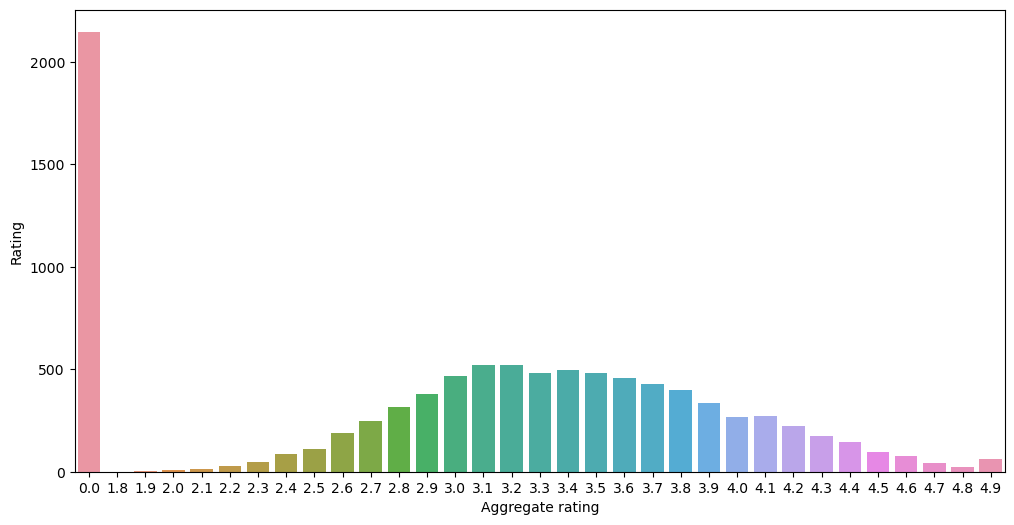

In [62]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating",data=rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating'>

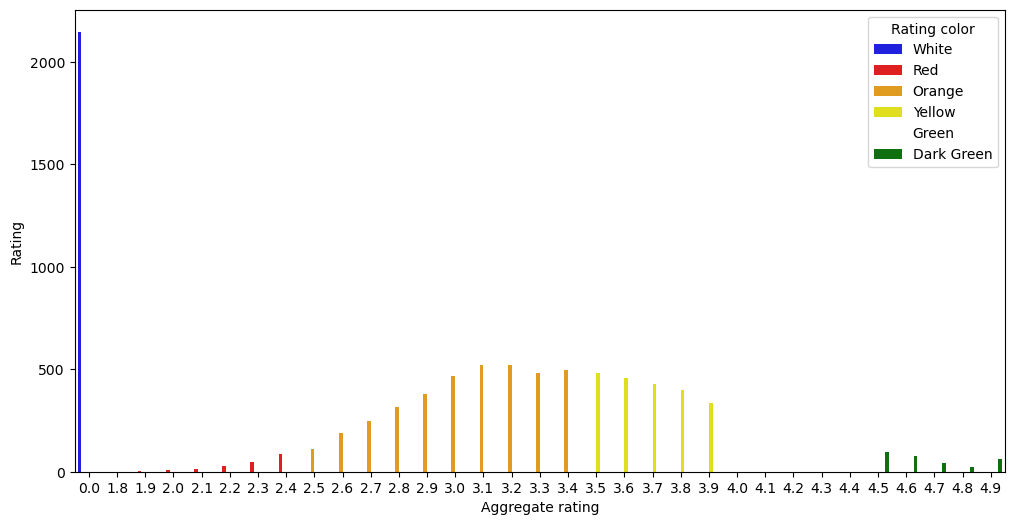

In [70]:
sns.barplot(x="Aggregate rating",y="Rating",hue='Rating color',data=rating,palette=['blue','red','orange','yellow','white','green','dark green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

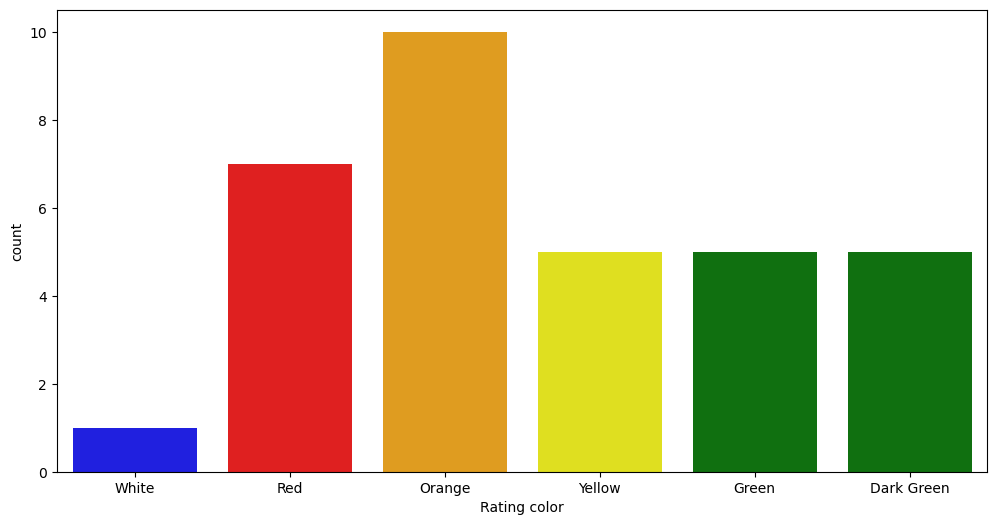

In [71]:
## Count plot
sns.countplot(x="Rating color",data=rating,palette=['blue','red','orange','yellow','green','green'])

In [ ]:
df_final['']

In [39]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [48]:
citybyorder=df_final['City'].value_counts().index[:4]

In [49]:
df_final['City'].value_counts().values[:5]

array([5473, 1118, 1080,  251,   25], dtype=int64)

In [50]:
orderbycity=df_final['City'].value_counts().values[:4]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

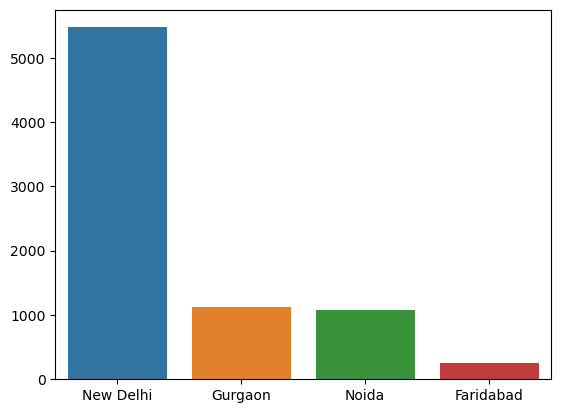

In [51]:
sns.barplot(citybyorder,orderbycity)

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [79]:
fav=df_final['Cuisines'].value_counts().index[:10]

In [80]:
fav_value=df_final['Cuisines'].value_counts().values[:10]

<AxesSubplot:>

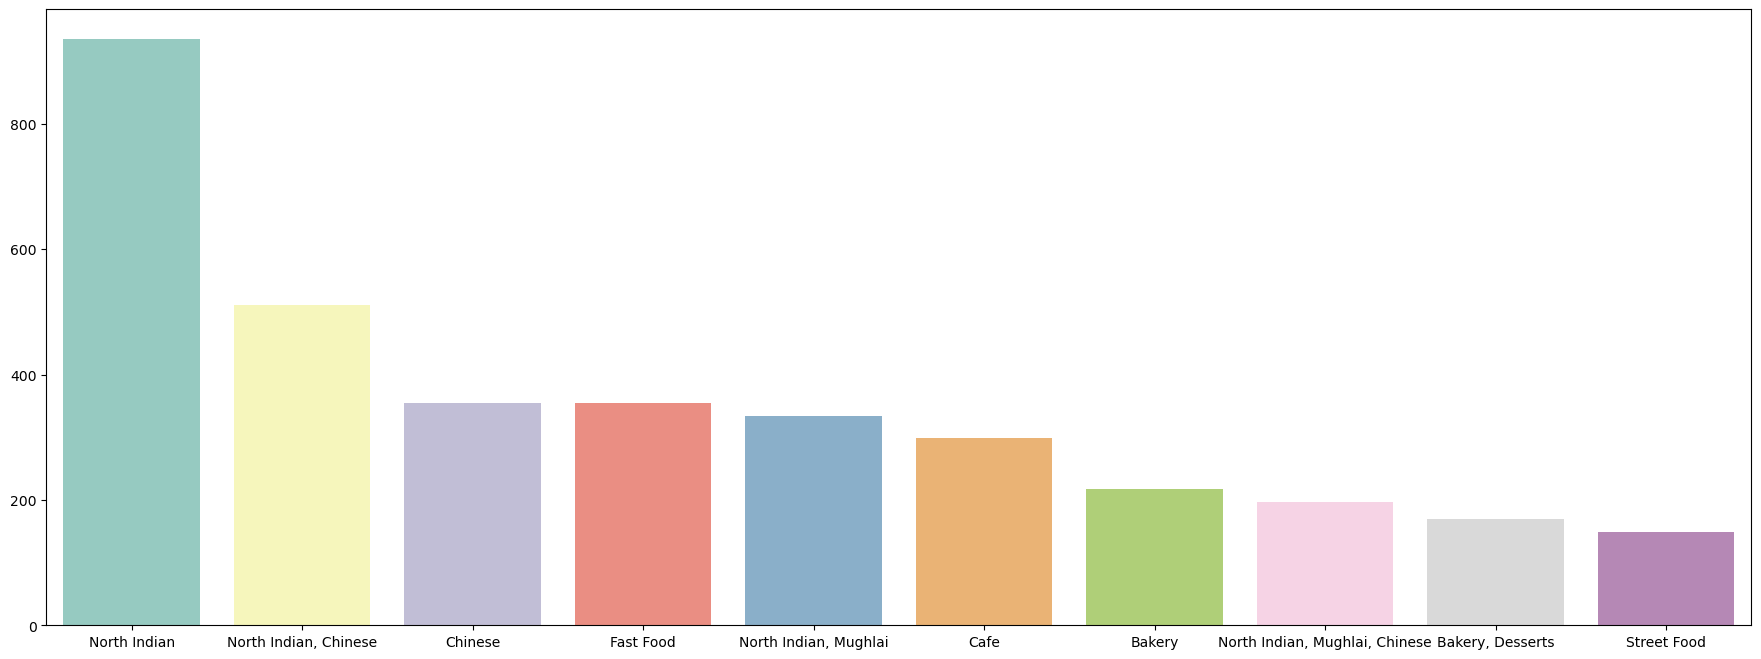

In [89]:
plt.figure(figsize=(22,8))
sns.barplot(x=fav, y=fav_value, palette="Set3")

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Define the dimensions of the diagram
width = 600
height = 400

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(width, height))

# Draw the boxes for the encoder and the MLP head
ax.add_patch(plt.Rectangle((100, 100), 200, 200, color='green'))
ax.add_patch(plt.Rectangle((300, 100), 200, 200, color='blue'))

# Add labels for the boxes
ax.text(100, 100, 'Transformer Encoder', size=16)
ax.text(300, 100, 'MLP Head', size=16)

# Draw the arrows connecting the boxes
plt.plot([100, 300], [100, 100], color='black', linestyle='-')
plt.plot([300, 100], [300, 200], color='black', linestyle='-')

# Add labels for the arrows
plt.text(200, 100, 'Input', size=16)
plt.text(200, 200, 'Output', size=16)

# Add title and show the plot
plt.title('Transformer Encoder Diagram')
plt.show()


MemoryError: In RendererAgg: Out of memory

<Figure size 60000x40000 with 1 Axes>